In [74]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import math

In [425]:
# Display two images
def display(a, b, title1 = "Original", title2 = "Predict"):
    plt.subplot(121), plt.imshow(cv2.cvtColor(a,cv2.COLOR_BGR2RGB)), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(cv2.cvtColor(b,cv2.COLOR_BGR2RGB)), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    plt.show()

# Display one image
def display_one(a, title1 = "Original"):
    plt.imshow(cv2.cvtColor(a,cv2.COLOR_BGR2RGB)), plt.title(title1)
    plt.show()



In [16]:
def loadImages(path):
    '''Put files into lists and return them as one list with all images 
     in the folder'''
    image_files = sorted([os.path.join(path, '', file)
                          for file in os.listdir(path + "/")
                          if file.endswith('.png')])
    return image_files

In [102]:
def draw_arrow_tip(image, point, size, color, horizontal):
    if horizontal:
        tips = [(point[0]+size, point[1]+size)
            , (point[0]+size, point[1]-size)]
    else:
        tips = [(point[0]+size, point[1]+size)
            , (point[0]-size, point[1]+size)]

    for tip in tips:
        cv2.line(image, point, tip, color, 1)

def draw_ticks(image, origin, positions, size, color, horizontal):
    for i in positions:
        if horizontal:
            p1 = (i, origin[1]-(size>>1))
            p2 = (p1[0], p1[1]+size)
        else:
            p1 = (origin[0]-(size>>1), i)
            p2 = (p1[0]+size, p1[1])

        cv2.line(image, p1, p2, color, 1)

In [433]:
! wget https://raw.githubusercontent.com/HatemHunish/file/master/0000003_002.png 

--2020-10-04 10:13:38--  https://raw.githubusercontent.com/HatemHunish/file/master/0000003_002.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 682722 (667K) [image/png]
Saving to: ‘0000003_002.png’

0000003_002.png     100%[===================>] 666.72K  --.-KB/s    in 0.04s   

2020-10-04 10:13:38 (16.9 MB/s) - ‘0000003_002.png’ saved [682722/682722]



In [437]:
path="/content"
images=loadImages(path)

In [438]:
images

['/content/images/0000001_009.png',
 '/content/images/0000001_011.png',
 '/content/images/0000003_002.png',
 '/content/images/0000008_009.png',
 '/content/images/test.png']

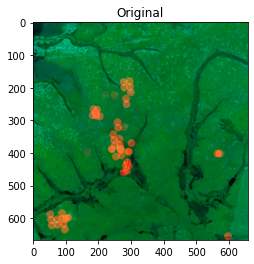

In [439]:
# image_original=cv2.imread(images[0])
test=cv2.imread('/content/images/0000003_002.png')
display_one(test)

In [440]:
def draw_arrow_tip(image, point, size, color, dir):
    if dir=="R":
        tips = [(point[0]+size, point[1]+size)
            , (point[0]+size, point[1]-size)]
    elif dir=="U":
        tips = [(point[0]+size, point[1]+size)
            , (point[0]-size, point[1]+size)]
    elif dir=="D":
        tips = [(point[0]+size, point[1]-size)
            , (point[0]-size, point[1]-size)]
    elif dir=="L":
        tips = [(point[0]-size, point[1]-size)
            , (point[0]-size, point[1]+size)]

    for tip in tips:
        cv2.line(image, point, tip, color, 5)
def draw_ticks(image, origin, positions, size, color, horizontal):
    for i in positions:
        if horizontal:
            p1 = (i, origin[1]-(size>>1))
            p2 = (p1[0], p1[1]+size)
        else:
            p1 = (origin[0]-(size>>1), i)
            p2 = (p1[0]+size, p1[1])

        cv2.line(image, p1, p2, color, 5)

In [441]:
def draw_aixs(image_org):
  EXTENSION = 15 # Amount to extend axis line to provision for end arrows
  ARROW_SIZE = 15 # X and Y offset for drawing the end arrow
  AXES_COLOR = (255,255,255)
  h,w,_=image_org.shape
  image=image_org.copy()
  x=EXTENSION
  y=h//2
  origin = (w//2,h//2)

  left = (w-EXTENSION, origin[1])
  right = (x, y)
  up=(w//2,EXTENSION)
  start_down=(w//2,h-EXTENSION)
  # image=cv2.circle(image,origin, 63, (0,255,0), -1)
  image2=cv2.line(image,left, (x,y), AXES_COLOR, 5)
  draw_arrow_tip(image, right, ARROW_SIZE, AXES_COLOR, 'R')
  draw_arrow_tip(image, left, ARROW_SIZE, AXES_COLOR, 'L')
  image2=cv2.line(image,up, start_down, AXES_COLOR, 5)
  draw_arrow_tip(image, up, ARROW_SIZE, AXES_COLOR, 'U')
  draw_arrow_tip(image, start_down, ARROW_SIZE, AXES_COLOR, 'D')
  return image

In [442]:
def calculateDistance(p1,p2):
  x1,y1=p1
  x2,y2=p2
  dist = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
  return dist

In [443]:
def get_intersections(x0, y0, r0, x1, y1, r1):
    # circle 1: (x0, y0), radius r0
    # circle 2: (x1, y1), radius r1

    d=math.sqrt((x1-x0)**2 + (y1-y0)**2)
    
    # non intersecting
    if d > r0 + r1 :
        return None
    # One circle within other
    if d < abs(r0-r1):
        return None
    # coincident circles
    if d == 0 and r0 == r1:
        return None
    else:
        a=(r0**2-r1**2+d**2)/(2*d)
        h=math.sqrt(r0**2-a**2)
        x2=x0+a*(x1-x0)/d   
        y2=y0+a*(y1-y0)/d   
        x3=math.floor(x2+h*(y1-y0)/d ) 
        y3=math.floor(y2-h*(x1-x0)/d )

        x4=math.floor(x2-h*(y1-y0)/d)
        y4=math.floor(y2+h*(x1-x0)/d)
        
        return (x3, y3, x4, y4)

In [444]:
def predict(img,wind_ang,wind_speed):
  hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
  circles=[]
  intersect=[]
  dis=[]
  color_range=[0, 0, 0, 58, 255, 255]
  lower= np.array(color_range[0:3]) 
  upper= np.array(color_range[3:]) 
  mask = cv2.inRange(hsv,lower,upper)
  contours,_= cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  cv2.drawContours(img,contours,-1,(0,255,0),10)
  n = len(contours) if (contours != None) else 0
  for i in range(0,n):
    cnt = contours[i]
    per = cv2.arcLength(cnt,True)
    # print('per = %.0f'%(per)) 
    if per > 100:
      x,y,w,h = cv2.boundingRect(cnt)
      x1,y1=(x+w,y+h)
      angle=wind_ang
      theta= angle * 3.14 / 180.0
      length=(math.floor(wind_speed))
      x2 = math.floor(x1 + length * math.cos(theta))
      y2 = math.floor(y1 + length * math.sin(theta) )
      cv2.arrowedLine(img, (x+w,y+h), (x2,y2 ), 
                                      (0,255,0), 5)
      circles.append((x2,y2 ))
      cv2.circle(img, (x2,y2 ), 50, (0,255,255), 2)
      cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),1)
  for i in circles:
    for j in circles:
      cx1,cy1=i
      cx2,cy2=j
      if get_intersections(cx1, cy1, 50, cx2, cy2, 50)  != None:
        cx3,cy3,cx4,cy4=get_intersections(cx1, cy1, 50, cx2, cy2, 50)
        # cv2.circle(img, (cx3,cy3 ), 1, (255,0,255), 10)
        # cv2.circle(img, (cx4,cy4 ), 1, (255,0,255), 10)
        intersect.append((cx3,cy3))
        intersect.append((cx4,cy4))
  for i in intersect:
    for j in intersect:
      dis.append(calculateDistance(i,j))
  rad=math.floor(max(dis))
  cv2.circle(img, intersect[0], rad, (0,0,255),5)
  print(rad)
  return img

In [445]:
import urllib.request
import urllib.request, urllib.parse, urllib.error
import ssl
import json
import datetime as DT

def get_wind():
  today = DT.datetime.today()
  date=dict()
  date['start']=today.strftime("%Y-%m-%d") 
  before=today-DT.timedelta(days=7)
  date['end']=before.strftime("%Y-%m-%d") 
  print(date['end'])
  # Ignore SSL certificate errors
  ctx = ssl.create_default_context()
  ctx.check_hostname = False
  ctx.verify_mode = ssl.CERT_NONE
  serviceurl="http://api.weatherapi.com/v1/"
  api_key="e83fd03f74394d89b9884546200310"
  parms = dict()
  time={'history':False,'Current':True}
  parms['key'] = api_key
  parms["q"] = 'London'


  if time['history']:
      parms["dt"] =date['start']
      parms["end_dt"] =date['end']
      # parms["d"] =7
      serviceurl=serviceurl+"history.json?"
  else:
      parms["d"] =7
      serviceurl=serviceurl+"forecast.json?"
  url = serviceurl + urllib.parse.urlencode(parms)
  print('Retrieving', url)
  uh = urllib.request.urlopen(url, context=ctx)
  data = uh.read().decode()
  print(data)  # We print in case unicode causes an error

  try:
      js = json.loads(data)
  except:
      print(data)  # We print in case unicode causes an error
      
  print('Retrieved', len(data), 'characters', data[:20].replace('\n', ' '))
  if 'status' not in js or (js['status'] != 'OK' and js['status'] != 'ZERO_RESULTS') :
          print('==== Failure To Retrieve ====')
          if time['Current']:
              print('wind direction',js['current']['wind_dir'])
              print('wind speed',js['current']['wind_kph'])
              print('wind degree',js['current']['wind_degree'])
              return (js['current']['wind_degree'],js['current']['wind_kph'])
          else:
              print(js['forecast'])
  

2020-09-27
Retrieving http://api.weatherapi.com/v1/forecast.json?key=e83fd03f74394d89b9884546200310&q=London&d=7
{"location":{"name":"London","region":"City of London, Greater London","country":"United Kingdom","lat":51.52,"lon":-0.11,"tz_id":"Europe/London","localtime_epoch":1601806512,"localtime":"2020-10-04 11:15"},"current":{"last_updated_epoch":1601805605,"last_updated":"2020-10-04 11:00","temp_c":10.0,"temp_f":50.0,"is_day":1,"condition":{"text":"Light rain","icon":"//cdn.weatherapi.com/weather/64x64/day/296.png","code":1183},"wind_mph":12.5,"wind_kph":20.2,"wind_degree":220,"wind_dir":"SW","pressure_mb":982.0,"pressure_in":29.5,"precip_mm":0.1,"precip_in":0.0,"humidity":87,"cloud":75,"feelslike_c":7.0,"feelslike_f":44.6,"vis_km":10.0,"vis_miles":6.0,"uv":3.0,"gust_mph":17.9,"gust_kph":28.8},"forecast":{"forecastday":[{"date":"2020-10-04","date_epoch":1601769600,"day":{"maxtemp_c":12.8,"maxtemp_f":55.0,"mintemp_c":6.7,"mintemp_f":44.1,"avgtemp_c":10.9,"avgtemp_f":51.7,"maxwind_mp

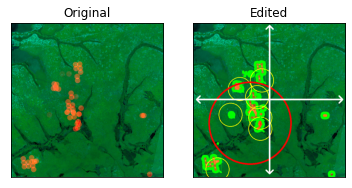

In [446]:
wind_degree,wind_speed=get_wind()
img_1=test.copy()
detected=predict(img_1,wind_degree,wind_speed)
img=draw_aixs(detected)
display(test,img)
